## EDA: RML2016.10a Dataset

This work is copyright DeepSig Inc. 2017.
It is provided open source under the Create Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) Licence
https://creativecommons.org/licenses/by-nc/4.0/

Use of this work, or derivitives inspired by this work is permitted for non-commercial usage only and with explicit citaiton of this original work.

A more detailed description of this work can be found at
https://arxiv.org/abs/1602.04105

A more detailed description of the RML2016.10a dataset can be found at
http://pubs.gnuradio.org/index.php/grcon/article/view/11

The RML2016.10a dataset is used for this work (https://radioml.com/datasets/)


In [1]:
# Import all the things we need ---
#   by setting env variables before Keras import you can set up which backend and which GPU it uses
%matplotlib inline
import os,random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as cPickle, random, sys, keras
import scipy


# Dataset setup

In [2]:
# Load the dataset ...
#  You will need to seperately download or generate this file
Xd = cPickle.load(open("RML2016.10b.dat",'rb'), encoding='latin1')


After unpickling, the data file is a data dictionary. The keys represent the modulation, the values contains the examples, in the form of I and Q data.
```
modKey -> N examples -> 
  I (128 samples)
  Q (128 samples)
```

In [3]:
INTENSITY_AXIS=0
QUADRATURE_AXIS=1

In [4]:
print("{0} modulations are supported, listed below. \nThis is essentially the ONLY LABELS of this dataset \n\n {1} ".format(len(Xd.keys()), Xd.keys()))

200 modulations are supported, listed below. 
This is essentially the ONLY LABELS of this dataset 

 dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('PAM4', 18), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('8PSK', -18), ('PAM4', -6), ('WBFM', -18), ('BPSK', 8), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('AM-DSB', -18), ('QPSK', 8), ('PAM4', 14), ('WBFM', -8), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('8PSK', -10), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('WBFM', -14), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('QAM16', 8), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('WBFM', 10), ('BPSK', -20), (

In [5]:
f = lambda i: (i,len(Xd[i]))
examplesCount=[ f(i) for i in (Xd.keys())]
examplesCount[:5]
print("Number of examples for each modulation is the same, at {0}".format(examplesCount[0][1]))


Number of examples for each modulation is the same, at 6000


In [6]:
MODULATION=('8PSK', 6)
print("Shape of each modulation is {0}, indicating 6000 examples of I and Q data with 128 samples each".format(Xd[('WBFM', 12)].shape))
print("Stats of Itensity. min:{0}, max:{1}".format(Xd[MODULATION][:,0,:].min(),Xd[MODULATION][:,INTENSITY_AXIS,:].max()))
print("Stats of Quadrature. min:{0}, max:{1}".format(Xd[MODULATION][:,0,:].min(),Xd[MODULATION][:,QUADRATURE_AXIS,:].max()))

Shape of each modulation is (6000, 2, 128), indicating 6000 examples of I and Q data with 128 samples each
Stats of Itensity. min:-0.04574605077505112, max:0.028535952791571617
Stats of Quadrature. min:-0.04574605077505112, max:0.03015870228409767


In [7]:
complex_xD=Xd[MODULATION][:,INTENSITY_AXIS,:]+1j*Xd[MODULATION][:,QUADRATURE_AXIS,:]
print("Converting IQ data with shape {0} to complex signals with shape {1} with type {2}".format(Xd[MODULATION].shape,complex_xD.shape, type(complex_xD[0][0])))
Xd[MODULATION][:2,INTENSITY_AXIS,:].shape
np.abs(complex_xD[:2]).shape

Converting IQ data with shape (6000, 2, 128) to complex signals with shape (6000, 128) with type <class 'numpy.complex64'>


(2, 128)

Attempting to represent IQ data in different forms

Plotting the I, Q and the resulting Amplitude after converting into Complex number


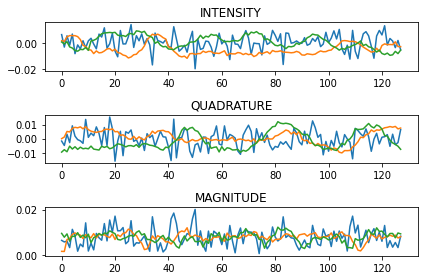

In [8]:
print("Attempting to represent IQ data in different forms\n")
print("Plotting the I, Q and the resulting Amplitude after converting into Complex number")
startEg=0
endEg=3
fig, axs = plt.subplots(3)

for iPlot in Xd[MODULATION][startEg:endEg,INTENSITY_AXIS,:]:
    axs[0].plot(iPlot)
axs[0].set_title('INTENSITY')

for qPlot in Xd[MODULATION][startEg:endEg,QUADRATURE_AXIS,:]:
    axs[1].plot(qPlot)
axs[1].set_title('QUADRATURE')

for mPlot in np.abs(complex_xD[startEg:endEg]): 
    axs[2].plot(mPlot)
axs[2].set_title('MAGNITUDE')
fig.tight_layout()

In [9]:
print("Assess the correlation between the data since there is a clear operation from IQ to Complex magnitude")
print("Computing on the assumption that I,Q and M are features on their own, and the examples are taken off the same reading which makes them dependant of each other. E.g. 3rd feature of 2nd example of I, Q and M all from same reading")
iReshaped=Xd[MODULATION][:,INTENSITY_AXIS,:].flatten()
qReshaped=Xd[MODULATION][:,QUADRATURE_AXIS,:].flatten()
mReshaped=np.abs(complex_xD).flatten()
print("\nI-Q: {0}\nI-M: {1}\nQ-M: {2}".format(scipy.stats.spearmanr(iReshaped,qReshaped,nan_policy='omit')[0],scipy.stats.spearmanr(iReshaped,mReshaped,nan_policy='omit')[0],scipy.stats.spearmanr(mReshaped,qReshaped,nan_policy='omit')[0]))
print("\nNear zero correlation demonstrates no correlation, meaning they are ok to be used for machine learning features without risk of multicollinearity issues")

Assess the correlation between the data since there is a clear operation from IQ to Complex magnitude
Computing on the assumption that I,Q and M are features on their own, and the examples are taken off the same reading which makes them dependant of each other. E.g. 3rd feature of 2nd example of I, Q and M all from same reading

I-Q: 0.007915071402321363
I-M: -0.009570137317006244
Q-M: -0.0037127863371026015

Near zero correlation demonstrates no correlation, meaning they are ok to be used for machine learning features without risk of multicollinearity issues
